#                                               FINANCIAL DATA ANALYSIS

### Importing necessary libraries

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [129]:
df=pd.read_csv('Financial Sample.xlsx - Sheet1.csv')
df.head(5)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,$ 3.00,$ 20.00,"$ 32,370.00",$ -,"$ 32,370.00","$ 16,185.00","$ 16,185.00",1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,$ 3.00,$ 20.00,"$ 26,420.00",$ -,"$ 26,420.00","$ 13,210.00","$ 13,210.00",1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,$ 3.00,$ 15.00,"$ 32,670.00",$ -,"$ 32,670.00","$ 21,780.00","$ 10,890.00",6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,$ 3.00,$ 15.00,"$ 13,320.00",$ -,"$ 13,320.00","$ 8,880.00","$ 4,440.00",6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,$ 3.00,$ 15.00,"$ 37,050.00",$ -,"$ 37,050.00","$ 24,700.00","$ 12,350.00",6/1/2014,6,June,2014


### Data cleaning

In [130]:
df=df.replace('[\$\,\(\)\-\ ]','',regex=True)

In [131]:
df.columns=df.columns.str.strip()

In [132]:
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

### Changing datatype

In [133]:
col=['Manufacturing Price','Sale Price', 'Gross Sales', 'Discounts','Sales', 'COGS', 'Profit']
df[col] = df[col].apply(pd.to_numeric)
print(df.dtypes)

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object


#### Analysing Data and getting insights from it

### (1) Finding Months with highest and lowest sales ?

In [134]:
dfmonthlysales=df.groupby('Month Number').sum()['Sales'].reset_index()
dfmonthlysales.sort_values(by='Sales', ascending=False, ignore_index=True)

,Month Number,Sales
0,10,21671431.02
1,12,17367228.98
2,11,12651417.50
3,9,10882697.27
4,6,9518893.82
5,7,8102920.19
6,2,7297531.39
7,4,6964775.08
8,1,6607761.69
9,5,6210211.06


#### Sales was highest in the month of September and lowest in March

### Visual Representation of Sales in different months

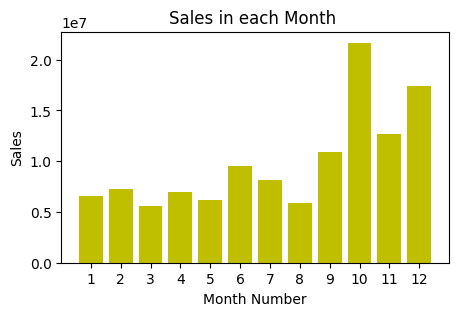

In [135]:
a=dfmonthlysales['Month Number']
w=1
y1bar=np.arange(len(a))
plt.figure(figsize=(5,3))
plt.bar(dfmonthlysales['Month Number'],dfmonthlysales['Sales'],color='y')
plt.xlabel('Month Number')
plt.xticks(y1bar+w,a)
plt.ylabel('Sales')
plt.title('Sales in each Month ')
plt.show()

#### (2)Analysing Profit in each month

In [136]:
dfp=df.groupby('Month Number').sum()['Profit'].reset_index()
dfp.sort_values(by='Profit', ascending=False, ignore_index=True)

,Month Number,Profit
0,10,3678956.02
1,12,2980229.98
2,9,1975945.27
3,11,1632177.50
4,6,1544988.82
5,2,1208474.89
6,4,981667.08
7,7,959280.69
8,5,942270.06
9,1,935061.19


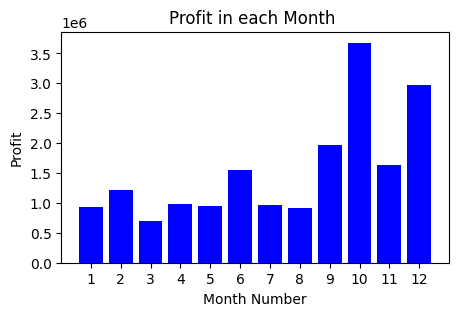

In [137]:
a=dfp['Month Number']
w=1
y1bar=np.arange(len(a))
plt.figure(figsize=(5,3))
plt.bar(dfp['Month Number'],dfp['Profit'],color='b')
plt.xlabel('Month Number')
plt.xticks(y1bar+w,a)
plt.ylabel('Profit')
plt.title('Profit in each Month ')
plt.show()

#### Profit was highest in October and lowest in March

### (3) Analysing Sales and Profit based on Products.

In [138]:
dfpro=df.groupby('Product').sum()[['Sales','Profit']].reset_index()
dfpro.sort_values(by='Profit', ascending=False, ignore_index=True)

,Product,Sales,Profit
0,Paseo,33011143.96,5038535.46
1,VTT,20511921.02,3278088.02
2,Amarilla,17747116.07,3057984.07
3,Velo,18250059.47,2556904.97
4,Carretera,13815307.89,2289024.89
5,Montana,15390801.88,2227807.38


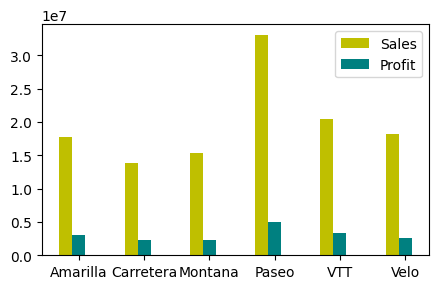

In [139]:
x=dfpro['Product']
y1=dfpro['Sales']
y2=dfpro['Profit']

w=0.2
#locations to plot
y1bar=np.arange(len(x))
y2bar=[i+w for i in y1bar]

plt.figure(figsize=(5,3))
plt.bar(y1bar,y1,width=w,label='Sales',color='y')
plt.bar(y2bar,y2,width=w,label='Profit',color='teal')


plt.xticks(y1bar+w,x)
plt.legend()
plt.show()

#### Maximum sold Product is Paseo which has the highest sales and Profit.
#### Lowest Profit is from the product Montana and lowest sales was for product Carretera


### (4) Most Sold Product

In [140]:
dfs=pd.DataFrame(df.groupby('Product').sum()[['Units Sold']]).reset_index()
dfs.sort_values(['Units Sold'],ascending=False,ignore_index=True)

,Product,Units Sold
0,Paseo,338239.5
1,VTT,168783.0
2,Velo,162424.5
3,Amarilla,155315.0
4,Montana,154198.0
5,Carretera,146846.0


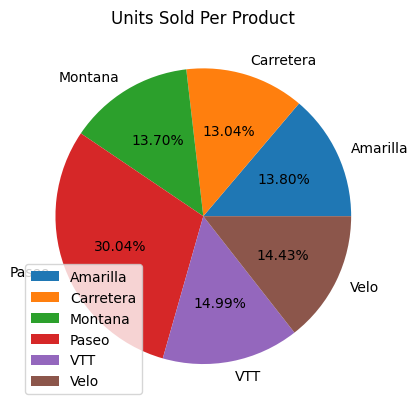

In [141]:
labels = dfs['Product']
sizes = dfs['Units Sold']
# Create the pie chart
plt.pie(sizes, labels=labels,autopct="%2.2f%%")
# Customize the plot
plt.title('Units Sold Per Product')
# Display the plot
plt.legend()
plt.show()

#### Paseo is the most sold product and Carretera is least sold


### (5)which country is highest in terms of sales?

In [142]:
dfcon=df.groupby('Country').sum()['Sales'].reset_index()
dfcon.sort_values(['Sales'],ascending=False,ignore_index=True)

,Country,Sales
0,UnitedStatesofAmerica,25029830.18
1,Canada,24887654.89
2,France,24354172.29
3,Germany,23505340.82
4,Mexico,20949352.11


<function matplotlib.pyplot.show(close=None, block=None)>

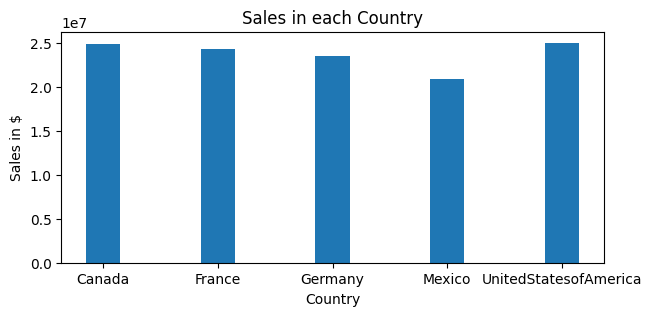

In [143]:
w=0.3
plt.figure(figsize=(7,3))
plt.bar(dfcon['Country'],dfcon['Sales'],width=w)
plt.xlabel('Country')
plt.ylabel('Sales in $')
plt.title('Sales in each Country')
plt.show

## In terms of country sales is highest in United States of America and lowest in Mexico

### (6) Sales and profit per segment

In [144]:
dfh=df.groupby('Segment').sum()[['Sales','Profit']].reset_index()
dfh.sort_values(['Sales'],ascending=False,ignore_index=True)

,Segment,Sales,Profit
0,Government,52504260.68,11388173.18
1,SmallBusiness,42427918.50,4143168.50
2,Enterprise,19611694.38,940096.88
3,Midmarket,2381883.09,660103.09
4,ChannelPartners,1800593.64,1316803.14


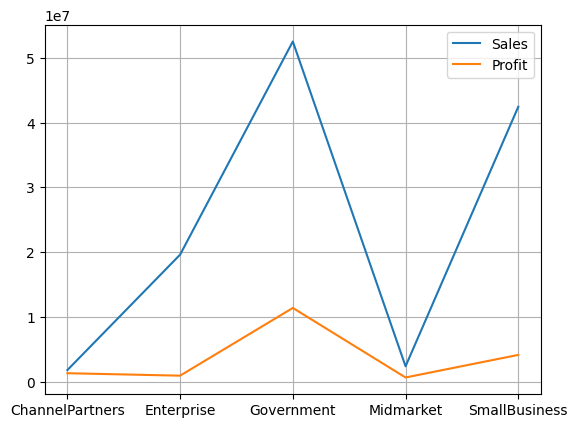

In [145]:
plt.plot(dfh['Segment'],dfh['Sales'],label='Sales')
plt.plot(dfh['Segment'],dfh['Profit'],label='Profit')
plt.legend()
plt.grid(True)
plt.show()

####  Sales highest in Government and lowest in channelpartners
#### Profit highest in Government and lowest in MidMarket

### (7) Most and Least sold product in each countries

In [146]:
dfn=pd.DataFrame(df.groupby(['Country','Product']).sum()[['Units Sold']])
dfn.sort_values(['Country','Units Sold'])

Units Sold
Country               Product              
Canada                Amarilla      29232.0
                      Montana       31488.5
                      Velo          32464.0
                      Carretera     34804.0
                      VTT           41248.5
                      Paseo         78191.5
France                Montana       31282.0
                      Amarilla      31603.0
                      Carretera     34056.0
                      VTT           35774.5
                      Velo          36609.5
                      Paseo         71606.0
Germany               Carretera     24944.0
                      Montana       28061.0
                      Amarilla      30614.5
                      Velo          31050.0
                      VTT           31131.0
                      Paseo         55693.5
Mexico                VTT           26129.0
                      Velo          26540.0
                      Carretera     27224.0
                      Amarilla      28396.0
                      Montana       31754.0
                      Paseo         63282.0
UnitedStatesofAmerica Carretera     25818.0
                      Montana       31612.5
                      VTT           34500.0
                      Amarilla      35469.5
                      Velo          35761.0
                      Paseo         69466.5

#### In Canada,France,Germany,Mexico and	United States of America,the least sold products are Amarilla,Montana,Carretera,VTT and Carretera respectively. 
#### The most sold product in all the 5 countries is Paseo.


### (8) Maximum and minimum profit

In [147]:
df[df["Profit"] == df["Profit"].max()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
192,Government,UnitedStatesofAmerica,Paseo,Low,3450.0,10.0,350.0,1207500.0,48300.0,1159200.0,897000.0,262200.0,7/1/2014,7,July,2014


#### Maximum profit was made by government segment of United states of America in the month of July for product Paseo

In [148]:
df[df["Profit"] == df["Profit"].min()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
615,Government,Germany,Carretera,High,280.0,3.0,7.0,1960.0,274.4,1685.6,1400.0,285.6,12/1/2014,12,December,2014
622,Government,Germany,VTT,High,280.0,250.0,7.0,1960.0,274.4,1685.6,1400.0,285.6,12/1/2014,12,December,2014


#### Minimum profit was made by government segment of Germany in the month of December for products Carretera and VTT

### (8) Maximum and minimum Cost of goods sold (COGS) 
##### Cost of goods sold (COGS) refers to the direct costs of producing the goods sold by a company. This amount includes the cost of the materials and labor directly used to create the good.

In [149]:
df[df["COGS"] == df["COGS"].max()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
405,SmallBusiness,Canada,Montana,Medium,3802.5,5.0,300.0,1140750.0,102667.5,1038082.5,950625.0,87457.5,4/1/2014,4,April,2014


#### COGS is maximum for the product Montana in Canada in small business segment

In [150]:
df[df["COGS"] == df["COGS"].min()]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
454,ChannelPartners,France,Amarilla,Medium,306.0,260.0,12.0,3672.0,330.48,3341.52,918.0,2423.52,12/1/2013,12,December,2013


#### COGS is minimum for the product Amarilla in France in ChannelPartners segment